In [1]:
1. Libraries
2. Reading and Exploring the Data
    2.1 An Overview from the Data
    2.2 Initial Prep
3. Graphical Exploration(EDA)
    3.1 Restaurants Overview
    3.2 Restaurants Services
    3.3 Where Are the Good Ones?
    3.4 Zomato Customers Preferences
    3.5 Food Options
4. Predicting the Success of a Restaurant
    4.1 Target Definition
    4.2 Feature Extraction
    4.3 Encoding
    4.4 Training a Model
    4.5 Predictions
    4.6 Accuracy

SyntaxError: invalid syntax (<ipython-input-1-cad05e8833c5>, line 1)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### so that u dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Reading restaurants data
data_path = 'F:\Data Science projects\EDA_Projects\zomato-bangalore-restaurants\zomato.csv'
from pandas import read_csv

In [3]:
df= read_csv(data_path)

# Results
print(f'Dataset shape: {df.shape}')
df.head()

Dataset shape: (51717, 17)


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


####  An overview from the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

#### getting all NAN features

In [6]:
feature_na=[feature for feature in df.columns if df[feature].isnull().sum()>0]
feature_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [8]:
#% of missing values
import numpy as np
for feature in feature_na:
    print('{} has {} % missing values'.format(feature,np.round(df[feature].isnull().sum()/len(df)*100,4)))

rate has 15.0337 % missing values
phone has 2.3358 % missing values
location has 0.0406 % missing values
rest_type has 0.4389 % missing values
dish_liked has 54.2916 % missing values
cuisines has 0.087 % missing values
approx_cost(for two people) has 0.669 % missing values


### Preparing Approx_cost column

In [9]:
df['approx_cost(for two people)'].dtype

dtype('O')

In [10]:
df[df['approx_cost(for two people)'].isnull()]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
1662,https://www.zomato.com/bangalore/papa-khan-ras...,"6, Abbiah Layout KC Halli Main Road, Bommanaha...",Papa Khan Rasoi,No,No,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,[],[],Delivery,Bannerghatta Road
1768,https://www.zomato.com/bangalore/innate-jp-nag...,"45, 14th Main, 7th phase, Puttehahalli Palya, ...",Innate,No,No,NaN,0,NaN,JP Nagar,Delivery,NaN,Beverages,NaN,[],[],Delivery,Bannerghatta Road
1795,https://www.zomato.com/bangalore/super-chefs-b...,"8/3, Opposite Suryadhoya Convention hall, Bann...",Super Chef's (New Royal treat),No,No,NaN,0,NaN,Bannerghatta Road,Quick Bites,NaN,"North Indian, Chinese, South Indian",NaN,"[('Rated 1.0', 'RATED\n Many items were missi...",[],Delivery,Bannerghatta Road
3069,https://www.zomato.com/bangalore/super-chefs-b...,"8/3, Opposite Suryadhoya Convention hall, Bann...",Super Chef's (New Royal treat),No,No,-,0,NaN,Bannerghatta Road,Quick Bites,NaN,"North Indian, Chinese, South Indian",NaN,"[('Rated 1.0', 'RATED\n Many items were missi...",[],Delivery,Basavanagudi
3774,https://www.zomato.com/bangalore/the-hub-ibis-...,"Ibis Bengaluru, Opposite RMZ Ecospace Business...",The Hub - Ibis Bengaluru,No,No,3.9/5,237,NaN,Marathahalli,Bar,"Dal Makhani, Cocktails, Lunch Buffet, Breakfas...",Finger Food,NaN,"[('Rated 4.0', 'RATED\n The Hub is a small ba...",[],Buffet,Bellandur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50940,https://www.zomato.com/bangalore/cinnabon-whit...,"Ground Floor, The Forum Neighborhood Mall, Pre...",Cinnabon,No,No,4.0 /5,80,NaN,Whitefield,Quick Bites,"Rolls, Cinnamon Roll, Cinnamon Bun","Beverages, American, Bakery",NaN,"[('Rated 4.0', ""RATED\n Who else is a Cinnabo...",[],Desserts,Whitefield
51233,https://www.zomato.com/bangalore/mayas-kitchen...,"43/9, Borewell Rd, Palm Meadows, Nallurhalli, ...",Mayas kitchen,No,No,NaN,0,NaN,Whitefield,Casual Dining,NaN,"South Indian, Chinese, Chettinad",NaN,"[('Rated 4.0', ""RATED\n Food was pretty good,...",[],Dine-out,Whitefield
51247,https://www.zomato.com/bangalore/mast-kalandar...,"D64, 33, 1st Floor, Sundari Armadale, Next To ...",Mast Kalandar,No,No,2.6 /5,76,NaN,Whitefield,Casual Dining,"Gulab Jamun, Lassi, Dal Makhani, Buttermilk, T...",North Indian,NaN,"[('Rated 1.0', 'RATED\n Terrible food in this...",[],Dine-out,Whitefield
51271,https://www.zomato.com/bangalore/karavalli-foo...,"N254-107, 1st Main Road, Near ITPL Gate 3, KIA...",Karavalli Food Court,No,No,3.2 /5,4,NaN,Whitefield,Casual Dining,NaN,South Indian,NaN,"[('Rated 1.0', 'RATED\n i was a regular custo...",[],Dine-out,Whitefield


In [11]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [12]:
### right now it has some NAN Values so it will be of float data-type,dats why very first I have to convert it into string then
### I have to remove this comma
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).apply(lambda x: x.replace(',', ''))

In [13]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(float)

In [14]:
df['approx_cost(for two people)'].dtype

dtype('float64')

### preparing rate_num col

In [15]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [16]:
df['rate'][0].split('/')[0]

'4.1'

In [17]:
def split(x):
    return x.split('/')[0]

In [18]:
df['rate'].dtype

dtype('O')

In [19]:
df['rate'].isnull().sum()

7775

In [20]:
### right now it has some NAN Values so it will be of float data-type,dats why very first I have to convert it into string then
### I have to split it & access 
df['rate']=df['rate'].astype(str).apply(split)
### ''' df['rate'] = df['rate'].astype(str).apply(lambda x: x.split('/')[0])'''

In [21]:
df['rate']=df['rate'].astype(str).astype(float)

ValueError: could not convert string to float: 'NEW'

In [25]:
df['rate'].replace('NEW',0,inplace=True)
df['rate'].replace('-',0,inplace=True)

In [26]:
df['rate']=df['rate'].astype(str).astype(float)

In [27]:
df['rate'].dtype


dtype('float64')

#### How many types of restaurants we have?

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12))
df['rest_type'].value_counts().nlargest(20).plot.bar(color='red')

### to provide styling to text on x-axis
plt.gcf().autofmt_xdate()

In [30]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [31]:
df['rest_type'].value_counts()

Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Bakery, Food Court                2
Cafe, Food Court                  2
Dessert Parlor, Kiosk             2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

In [32]:
def mark(x):
    if x in ('Quick Bites', 'Casual Dining'):
        return 'Quick Bites + Casual Dining'
    else:
        return 'other'
### df['Top_types']=df['rest_type'].apply(lambda x: 'Quick Bites + Casual Dining' if x in ('Quick Bites', 'Casual Dining') else 'Other')    
    

In [33]:
df['Top_types']=df['rest_type'].apply(mark)

In [34]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites + Casual Dining
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites + Casual Dining
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,other
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites + Casual Dining
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites + Casual Dining


In [35]:
import plotly.express as px
values=df['Top_types'].value_counts()
labels=df['Top_types'].value_counts().index

In [ ]:
fig = px.pie(df, values=values, names=labels,title='Restaurants Pie chart')
fig.show()

In [ ]:
### Almost 60 % of restaurants are of Casual Dining & Quick Bites

In [37]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites + Casual Dining
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites + Casual Dining
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,other
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites + Casual Dining
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites + Casual Dining


In [38]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Top_types'],
      dtype='object')

In [39]:
df.dtypes

url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)    float64
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
Top_types                       object
dtype: object

In [40]:
rest=df.groupby('name').agg({'votes': 'sum','url': 'count','approx_cost(for two people)': 'mean','rate': 'mean'}).reset_index()
rest

,name,votes,url,approx_cost(for two people),rate
0,#FeelTheROLL,14,2,200.0,3.400000
1,#L-81 Cafe,432,9,400.0,3.900000
2,#Vibes Restro,0,3,700.0,NaN
3,#refuel,111,3,400.0,3.700000
4,'Brahmins' Thatte Idli,0,1,100.0,NaN
...,...,...,...,...,...
8787,late100,0,5,200.0,NaN
8788,nu.tree,1443,8,400.0,4.314286
8789,re:cess - Hilton Bangalore Embassy GolfLinks,438,3,1200.0,4.100000
8790,repEAT Hub,0,2,200.0,NaN


In [41]:
rest.columns = ['name', 'total_votes', 'total_unities', 'avg_approx_cost', 'mean_rating']
rest.head()

,name,total_votes,total_unities,avg_approx_cost,mean_rating
0,#FeelTheROLL,14,2,200.0,3.4
1,#L-81 Cafe,432,9,400.0,3.9
2,#Vibes Restro,0,3,700.0,NaN
3,#refuel,111,3,400.0,3.7
4,'Brahmins' Thatte Idli,0,1,100.0,NaN


In [42]:
rest['votes_per_unity'] = rest['total_votes'] / rest['total_unities']
rest.head()

,name,total_votes,total_unities,avg_approx_cost,mean_rating,votes_per_unity
0,#FeelTheROLL,14,2,200.0,3.4,7.0
1,#L-81 Cafe,432,9,400.0,3.9,48.0
2,#Vibes Restro,0,3,700.0,NaN,0.0
3,#refuel,111,3,400.0,3.7,37.0
4,'Brahmins' Thatte Idli,0,1,100.0,NaN,0.0


In [43]:
popular=rest.sort_values(by='total_unities', ascending=False)
popular

,name,total_votes,total_unities,avg_approx_cost,mean_rating,votes_per_unity
1320,Cafe Coffee Day,3089,96,844.791667,3.147191,32.177083
5549,Onesta,347520,85,600.000000,4.410588,4088.470588
3788,Just Bake,2898,73,400.000000,3.355882,39.698630
2446,Empire Restaurant,229808,71,685.211268,3.916901,3236.732394
2577,Five Star Chicken,3134,70,257.857143,3.425000,44.771429
...,...,...,...,...,...,...
1900,Cool Break,11,1,150.000000,3.400000,11.000000
8076,The Shake Factory Originals,8,1,200.000000,3.300000,8.000000
5216,Nethravathi Military Hotel,0,1,200.000000,NaN,0.000000
7426,Swadisht North Indian Restaurant,23,1,200.000000,3.200000,23.000000


In [44]:
popular['name'].nunique()

8792

In [ ]:
'''

# Correcting a restaurant name
bug_name = 'SantÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â© Spa Cuisine'
popular_franchises['name'] = popular_franchises['name'].apply(lambda x: 'Santa Spa Cusisine' if x == bug_name else x)


popular_franchises.head(10)'''

In [45]:
popular.shape

(8792, 6)

Text(0.5, 1.0, 'Top 5 Less Voted Restaurants\n(with at least 1 vote)')

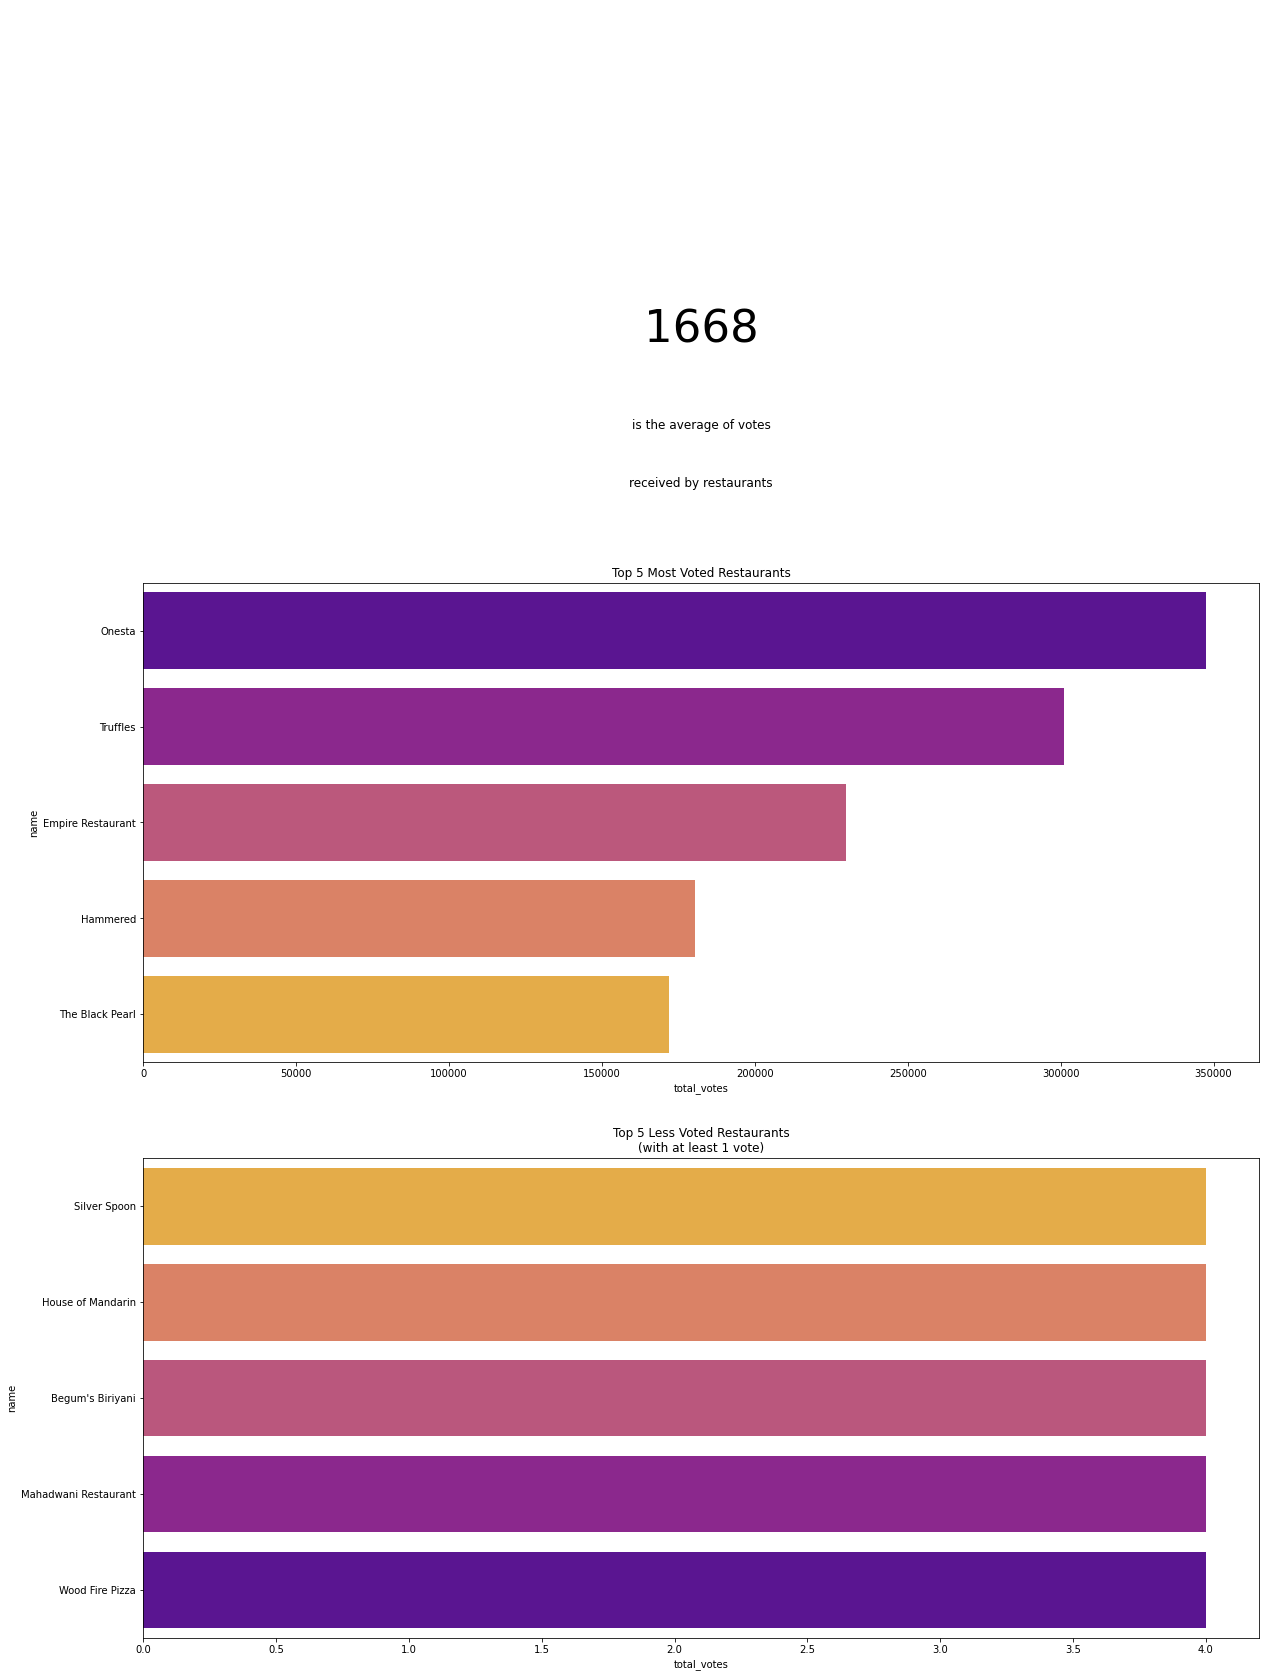

In [47]:
import seaborn as sns
# Creating a figure for restaurants overview analysis
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(20,30))

# Plot Pack 01 - Most popular restaurants (votes)

# Annotations
ax1.text(0.50, 0.30, int(popular['total_votes'].mean()), fontsize=45, ha='center')
ax1.text(0.50, 0.12, 'is the average of votes', fontsize=12, ha='center')
ax1.text(0.50, 0.00, 'received by restaurants', fontsize=12, ha='center')
ax1.axis('off')

sns.barplot(x='total_votes', y='name', data=popular.sort_values(by='total_votes', ascending=False)[0:5],ax=ax2, palette='plasma')
ax2.set_title('Top 5 Most Voted Restaurants', size=12)

sns.barplot(x='total_votes', y='name', data=popular.sort_values(by='total_votes', ascending=False).query('total_votes > 0').tail(),ax=ax3, palette='plasma_r')
ax3.set_title('Top 5 Less Voted Restaurants\n(with at least 1 vote)', size=12)


In [48]:
popular.columns

Index(['name', 'total_votes', 'total_unities', 'avg_approx_cost',
       'mean_rating', 'votes_per_unity'],
      dtype='object')

In [49]:
popular.head()

,name,total_votes,total_unities,avg_approx_cost,mean_rating,votes_per_unity
1320,Cafe Coffee Day,3089,96,844.791667,3.147191,32.177083
5549,Onesta,347520,85,600.000000,4.410588,4088.470588
3788,Just Bake,2898,73,400.000000,3.355882,39.698630
2446,Empire Restaurant,229808,71,685.211268,3.916901,3236.732394
2577,Five Star Chicken,3134,70,257.857143,3.425000,44.771429


Text(0.5, 1.0, 'Top 5 Less Expensive Restaurants')

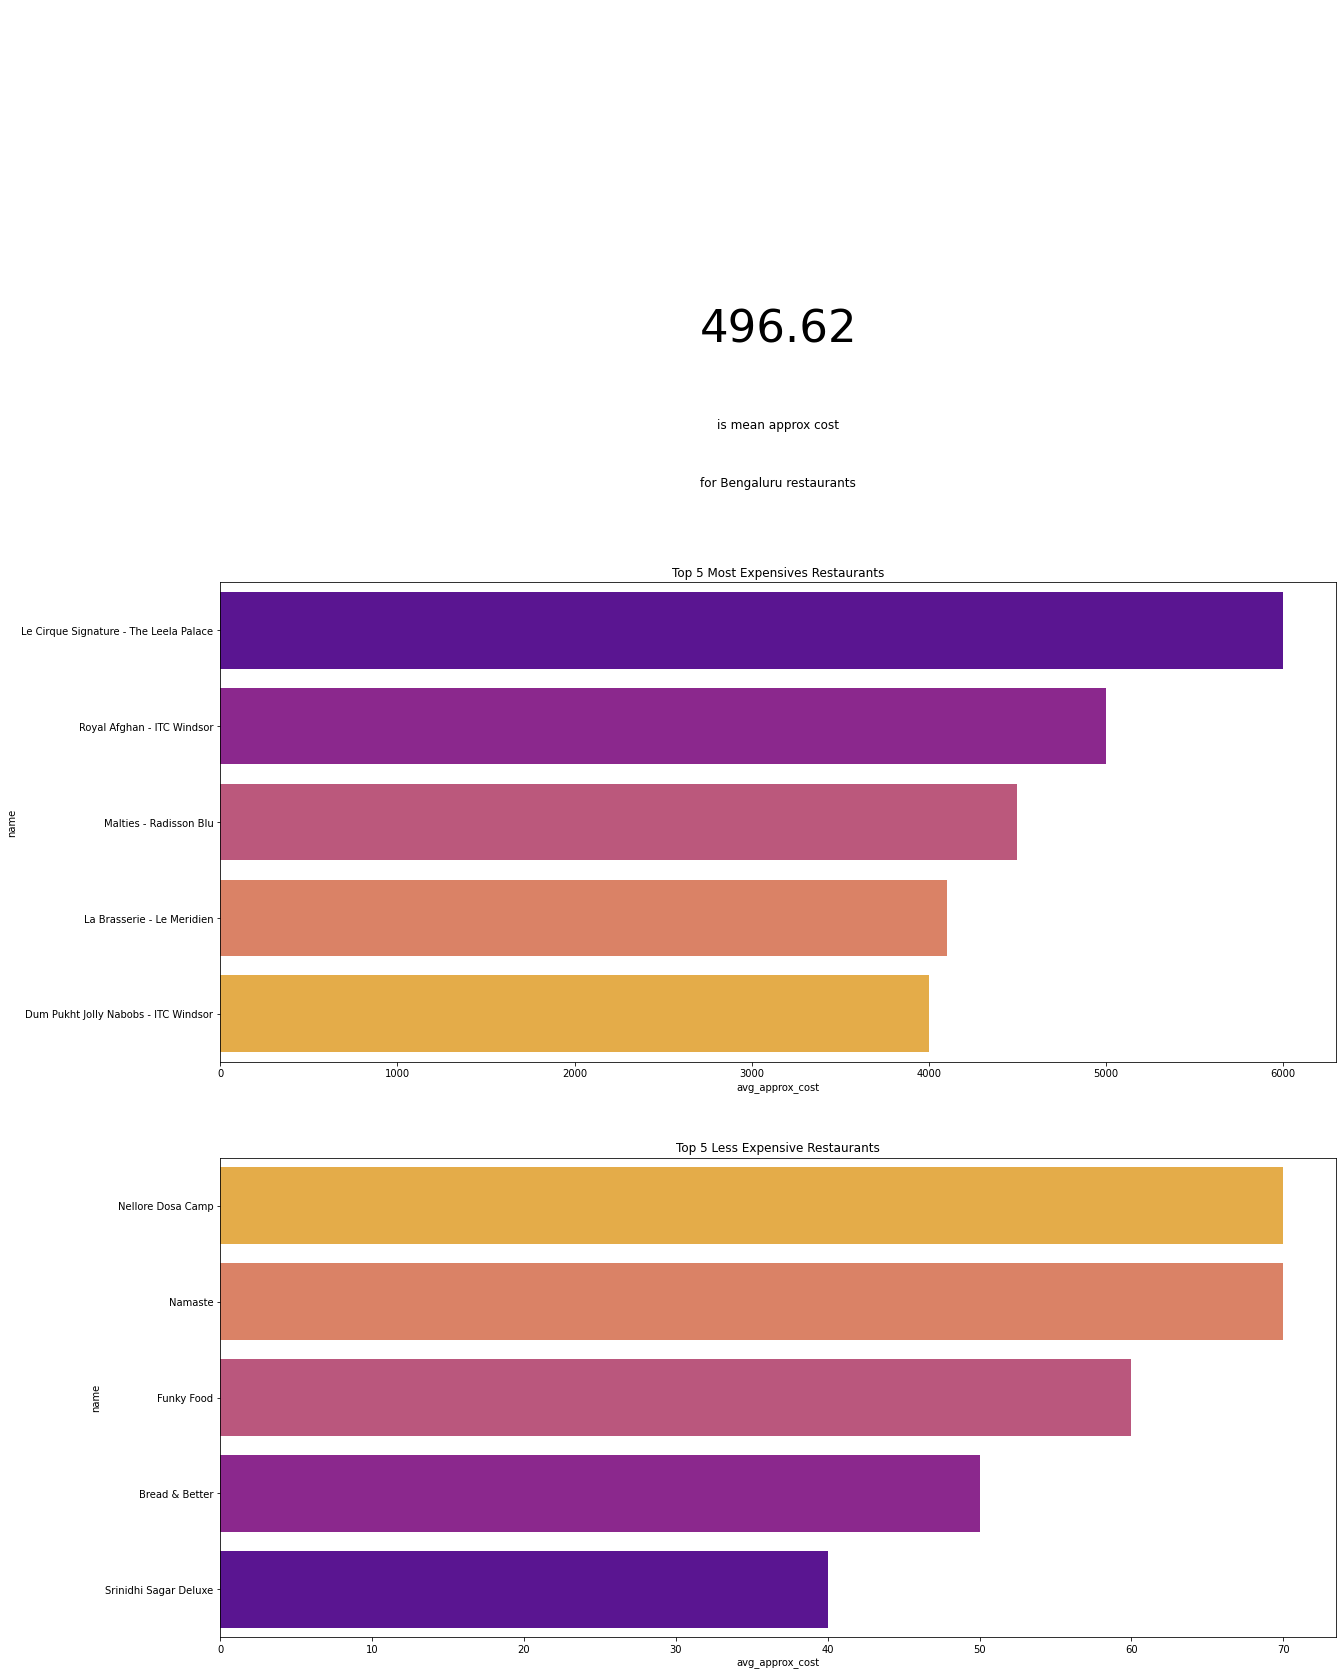

In [50]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(20,30))
# Annotations
import numpy as np
ax1.text(0.50, 0.30, np.round(popular['avg_approx_cost'].mean(), 2), fontsize=45, ha='center')
ax1.text(0.50, 0.12, 'is mean approx cost', fontsize=12, ha='center')
ax1.text(0.50, 0.00, 'for Bengaluru restaurants', fontsize=12, ha='center')
ax1.axis('off')

sns.barplot(x='avg_approx_cost', y='name', data=popular.sort_values(by='avg_approx_cost', ascending=False)[0:5],ax=ax2, palette='plasma')
ax2.set_title('Top 5 Most Expensives Restaurants', size=12)

sns.barplot(x='avg_approx_cost', y='name', data=popular.sort_values(by='avg_approx_cost', ascending=False).query('avg_approx_cost > 0').tail(),ax=ax3, palette='plasma_r')
ax3.set_title('Top 5 Less Expensive Restaurants', size=12)


#### How many restaurants offer Book Table service? And how about Online Order service?

In [51]:
import plotly.graph_objs as go
from plotly.offline import iplot
x=df['book_table'].value_counts()
labels=['not book','book']


In [ ]:
trace=go.Pie(labels=labels, values=x,
               hoverinfo='label+percent', textinfo='percent', 
               textfont=dict(size=25),
              pull=[0, 0, 0,0.2, 0]
               )
iplot([trace])

In [53]:
import plotly.express as px
x=df['online_order'].value_counts()
labels=['accepted','not accepted']

In [ ]:
fig = px.pie(df, values=x, names=labels,title='Pie chart')
fig.show()

### Finding Best budget Restaurants in any location
    we will pass location and restaurant type as parameteres,function will return name of restaurants.¶

In [120]:
def return_budget(location,restaurant):
    budget=df[(df['approx_cost(for two people)']<=400) & (df['location']==location) & 
                     (df['rate']>4) & (df['rest_type']==restaurant)]
    return(budget['name'].unique())

In [121]:
return_budget('BTM',"Quick Bites")

array(['Swadista Aahar', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Chaatimes', "Muthashy's", 'Swad Punjab Da',
       "Domino's Pizza", 'Roti Wala', 'Andhra Kitchen'], dtype=object)

#### geographical analysis

#### I need Latitudes & longitudes for each of the place for geaographical Data analysis,so to fetch lat,lon of each place,use Geopy

In [122]:
locations=pd.DataFrame({"Name":df['location'].unique()})

In [123]:
locations['new_Name']='Bangalore '+locations['Name']

In [124]:
locations.head()

,Name,new_Name
0,Banashankari,Bangalore Banashankari
1,Basavanagudi,Bangalore Basavanagudi
2,Mysore Road,Bangalore Mysore Road
3,Jayanagar,Bangalore Jayanagar
4,Kumaraswamy Layout,Bangalore Kumaraswamy Layout


In [ ]:
!pip install geopy

In [ ]:
from geopy.geocoders import Nominatim

In [ ]:
lat=[]
lon=[]
geolocator=Nominatim(user_agent="app")
for location in locations['Name']:
    location = geolocator.geocode(location)
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:    
        lat.append(location.latitude)
        lon.append(location.longitude)

In [ ]:
locations['latitude']=lat
locations['longitude']=lon

In [ ]:
locations.to_csv('zomato_locations.csv',index=False)

#### We have found out latitude and longitude of each location listed in the dataset using geopy.
#### This is used to plot maps.¶

In [ ]:
Rest_locations=pd.DataFrame(df['location'].value_counts().reset_index())

In [ ]:
Rest_locations.columns=['Name','count']
Rest_locations.head()

#### now combine both the dataframes

In [ ]:
Restaurant_locations=Rest_locations.merge(locations,on='Name',how="left").dropna()
Restaurant_locations.head()

In [ ]:
def generateBaseMap(default_location=[12.97, 77.59], default_zoom_start=12):
    base_map = folium.Map(location=default_location, zoom_start=default_zoom_start)
    return base_map

In [ ]:
import folium
from folium.plugins import HeatMap
basemap=generateBaseMap()

#### Heatmap of Restaurant

In [ ]:
HeatMap(Restaurant_locations[['lat','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)

#### It is clear that restaurants tend to concentrate in central bangalore area.
    The clutter of restaurants lowers are we move away from central.
    So,potential restaurant entrepreneurs can refer this and find out good locations for their venture.
    note heatmap is good when we have latitude,longitude or imporatnce of that particular place or count of that place

#### wordcloud of Customer Preference 

In [ ]:
data=df[df['rest_type']=='Quick Bites']

In [ ]:
data['dish_liked']

In [ ]:
stopwords=set(STOPWORDS)
dishes=''
for word in data['dish_liked']:
    words=word.split()
    # Converts each token into lowercase 
    for i in range(len(words)): 
        words[i] = words[i].lower() 
    dishes=dishes+ " ".join(words)+" "
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,stopwords = stopwords,width=1500, height=1500).generate(dishes)
plt.imshow(wordcloud)
plt.axis("off")

#### analysing Reviews of Particular Restaurant

In [ ]:
df['reviews_list'][0]

In [ ]:
data=df['reviews_list'][0].lower()
data

In [ ]:
import re
data2=re.sub('[^a-zA-Z]', ' ',data)
data2

In [ ]:
data3=re.sub('rated', ' ',data2)
data3

In [ ]:
data4=re.sub('x',' ',data3)
data4

#### remove multiple spaces

In [ ]:
re.sub(' +',' ',data4)

In [ ]:
dataset=df[df['rest_type']=='Quick Bites']
type(dataset['reviews_list'][3])

In [ ]:
total_review=' '
for review in dataset['reviews_list']:
    review=review.lower()
    review=re.sub('[^a-zA-Z]', ' ',review)
    review=re.sub('rated', ' ',review)
    review=re.sub('x',' ',review)
    review=re.sub(' +',' ',review)
    total_review=total_review + str(review)
 

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(total_review) 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8)) 
plt.imshow(wordcloud) 
plt.axis("off") 

####  Predicting the Success of a Restaurant

In [55]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Top_types'],
      dtype='object')

In [56]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, 3.5, nan, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4,
       2.2, 2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [57]:
# Splitting restaurants
### df['rated'] = df['rate'].apply(lambda x: 1 if x >= 0 else 0)
def assign(x):
    if x>0:
        return 1
    else:
        return 0
df['rated']=df['rate'].apply(assign)

In [58]:
df['rated'].unique()

array([1, 0], dtype=int64)

In [59]:
new_restaurants = df[df['rated'] == 0]
train_val_restaurants = df.query('rated == 1')


#### By now we've already splitted our original data into new_restaurants and train_val_restaurants using pandas DataFrames. Let's  keep the first one aside for now and let's work only with the training and validation set. The next step is to create our target variable to be used in this classification task.

#### The main point here is to define a fair threshold for splitting the restaurants into good and bad ones. It would be a  really experimental decision and we must keep in mind that this approach is not the best one. Probably it would let margin for classification errors. Even so, let's try!

In [60]:
train_val_restaurants.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types,rated
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,other,1
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1


In [61]:
train_val_restaurants['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

### Defining a custom threshold for splitting restaurants into good and bad

In [62]:
# Defining a custom threshold for splitting restaurants into good and bad
threshold = 3.75
train_val_restaurants['target'] = train_val_restaurants['rate'].apply(lambda x: 1 if x >= threshold else 0)


C:\Users\mcr\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [63]:
train_val_restaurants.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types,rated,target
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,other,1,1
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,0
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,1


0    21421
1    20244
Name: target, dtype: int64


([<matplotlib.patches.Wedge at 0xa0df9d93c8>,
 [Text(-0.04879500100763322, 1.0989172161162393, ''),
  Text(0.05323091019014493, -1.1988187812177156, '')],
 [Text(-0.026615455095072665, 0.5994093906088577, '51.4%'),
  Text(0.031051364277584537, -0.699310955710334, '48.6%')])

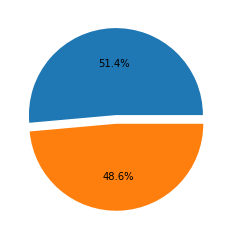

In [64]:
import matplotlib.pyplot as plt
x=train_val_restaurants['target'].value_counts()
labels=x.index
print(x)
plt.pie(x,explode=[0.0,0.1],autopct='%1.1f%%')

#### Ok, for our first trial it's fair. The meaning of all this is that we marked as good restaurants with a rate greater or equal to 3.75. Correct or not, let's continue to see what we can get from this.

#### The next step is to prepare some features for training our classification model.

### Feature Extraction

In [65]:
train_val_restaurants.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Top_types', 'rated', 'target'],
      dtype='object')

In [66]:
train_val_restaurants.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types,rated,target
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,other,1,1
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,0
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,1


In [67]:
## train_val_restaurants['total_cuisines'] = train_val_restaurants['cuisines'].astype(str).apply(lambda x: len(x.split(',')))

def count(x):
    return len(x.split(','))

In [68]:
#### as it have some NAN value that why very first I have to convert into str  &  then apply a function
train_val_restaurants['total_cuisines']=train_val_restaurants['cuisines'].astype(str).apply(count)
train_val_restaurants['multiple_types']=train_val_restaurants['rest_type'].astype(str).apply(count)

C:\Users\mcr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mcr\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [69]:
train_val_restaurants.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Top_types', 'rated', 'target',
       'total_cuisines', 'multiple_types'],
      dtype='object')

In [70]:
imp_features=['online_order','book_table','location','rest_type','multiple_types','total_cuisines','listed_in(type)', 'listed_in(city)','approx_cost(for two people)','target']

In [71]:
data = train_val_restaurants[imp_features]
## data = train_val_restaurants.loc[:, imp_features]

In [73]:
data.isnull().sum()

online_order                     0
book_table                       0
location                         0
rest_type                      149
multiple_types                   0
total_cuisines                   0
listed_in(type)                  0
listed_in(city)                  0
approx_cost(for two people)    247
target                           0
dtype: int64

In [74]:
data.dropna(how='any',inplace=True)

C:\Users\mcr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [75]:
data.isnull().sum()

online_order                   0
book_table                     0
location                       0
rest_type                      0
multiple_types                 0
total_cuisines                 0
listed_in(type)                0
listed_in(city)                0
approx_cost(for two people)    0
target                         0
dtype: int64

In [76]:
# Splitting features by data type
cat_features= [col for col in data.columns if data[col].dtype == 'O']
num_features= [col for col in data.columns if data[col].dtype != 'O']

In [77]:
cat_features

['online_order',
 'book_table',
 'location',
 'rest_type',
 'listed_in(type)',
 'listed_in(city)']

In [78]:
for feature in cat_features:
    print('{} has total {} unique features'.format(feature, data[feature].nunique()))

online_order has total 2 unique features
book_table has total 2 unique features
location has total 92 unique features
rest_type has total 87 unique features
listed_in(type) has total 7 unique features
listed_in(city) has total 30 unique features


#### But we will observe over here,we have many categories thus if we encode it using onne-hot encoding, it will consume more 
#### memory in our system

In [79]:
data.shape

(41271, 10)

In [80]:
cols=['location','rest_type','listed_in(city)']
for col in cols:
    print('Total feature in {} are {}'.format(col,data[col].nunique()))
    print(data[col].value_counts()/(len(data))*100)
    print('\n')
    

Total feature in location are 92
BTM                      9.398851
Koramangala 5th Block    5.565651
HSR                      4.829057
Indiranagar              4.361416
JP Nagar                 4.143345
                           ...   
Yelahanka                0.009692
West Bangalore           0.007269
Rajarajeshwari Nagar     0.004846
Peenya                   0.002423
Nagarbhavi               0.002423
Name: location, Length: 92, dtype: float64


Total feature in rest_type are 87
Quick Bites                   33.643478
Casual Dining                 23.299654
Cafe                           8.163117
Dessert Parlor                 4.482566
Delivery                       4.048848
                                ...    
Dessert Parlor, Food Court     0.004846
Dessert Parlor, Kiosk          0.004846
Bakery, Food Court             0.004846
Quick Bites, Kiosk             0.002423
Bakery, Beverage Shop          0.002423
Name: rest_type, Length: 87, dtype: float64


Total feature in listed_in(c

In [81]:
percent=data['location'].value_counts()/len(data)*100
values=percent.values


In [82]:
len(values[values>0.4])

46

In [83]:
#### lets set Threshold value 0.4 ,

In [84]:
values=data['location'].value_counts()/len(data)*100
values

BTM                      9.398851
Koramangala 5th Block    5.565651
HSR                      4.829057
Indiranagar              4.361416
JP Nagar                 4.143345
                           ...   
Yelahanka                0.009692
West Bangalore           0.007269
Rajarajeshwari Nagar     0.004846
Peenya                   0.002423
Nagarbhavi               0.002423
Name: location, Length: 92, dtype: float64

In [85]:
threshold=0.4
imp=values[values>threshold]
imp

BTM                      9.398851
Koramangala 5th Block    5.565651
HSR                      4.829057
Indiranagar              4.361416
JP Nagar                 4.143345
Jayanagar                3.959197
Whitefield               3.808970
Marathahalli             3.416443
Bannerghatta Road        2.970609
Koramangala 7th Block    2.556274
Koramangala 6th Block    2.553851
Brigade Road             2.549005
Bellandur                2.415740
Sarjapur Road            2.069250
Koramangala 1st Block    2.064404
Ulsoor                   2.057135
Koramangala 4th Block    2.037750
Electronic City          2.020789
MG Road                  1.921446
Banashankari             1.802719
Kalyan Nagar             1.681568
Malleshwaram             1.553149
Residency Road           1.463497
Richmond Road            1.463497
Basavanagudi             1.441690
Frazer Town              1.371423
Church Street            1.322963
Brookefield              1.315694
New BEL Road             1.226042
Kammanahalli  

In [86]:
data['location']=np.where(data['location'].isin(imp.index),data['location'],'other')

##X_train['location']=X_train['location'].apply(lambda x:'other' if x not in imp.index else x)

C:\Users\mcr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [87]:
data['location'].nunique()

47

In [88]:
values2=data['rest_type'].value_counts()/len(data)*100
values2

Quick Bites                   33.643478
Casual Dining                 23.299654
Cafe                           8.163117
Dessert Parlor                 4.482566
Delivery                       4.048848
                                ...    
Dessert Parlor, Food Court     0.004846
Dessert Parlor, Kiosk          0.004846
Bakery, Food Court             0.004846
Quick Bites, Kiosk             0.002423
Bakery, Beverage Shop          0.002423
Name: rest_type, Length: 87, dtype: float64

In [89]:
data['rest_type'].head(20)

0           Casual Dining
1           Casual Dining
2     Cafe, Casual Dining
3             Quick Bites
4           Casual Dining
5           Casual Dining
6           Casual Dining
7     Casual Dining, Cafe
8                    Cafe
9                    Cafe
10                   Cafe
11                   Cafe
12                   Cafe
13                   Cafe
14    Cafe, Casual Dining
15                   Cafe
16                   Cafe
17                   Cafe
18                   Cafe
19                   Cafe
Name: rest_type, dtype: object

In [90]:
len(values2[values2>0.3])

29

In [91]:
threshold=1.5
imp2=values2[values2>1.5]
imp2

Quick Bites           33.643478
Casual Dining         23.299654
Cafe                   8.163117
Dessert Parlor         4.482566
Delivery               4.048848
Takeaway, Delivery     3.099028
Casual Dining, Bar     2.645926
Bakery                 1.705798
Beverage Shop          1.555572
Bar                    1.550726
Name: rest_type, dtype: float64

In [92]:
imp2.index

Index(['Quick Bites', 'Casual Dining', 'Cafe', 'Dessert Parlor', 'Delivery',
       'Takeaway, Delivery', 'Casual Dining, Bar', 'Bakery', 'Beverage Shop',
       'Bar'],
      dtype='object')

In [93]:
data['rest_type'].isin(imp2.index)

0         True
1         True
2        False
3         True
4         True
         ...  
51709     True
51711     True
51712     True
51715     True
51716    False
Name: rest_type, Length: 41271, dtype: bool

In [94]:
data['rest_type']=np.where(data['rest_type'].isin(imp2.index),data['rest_type'],'other')
##data['rest_type'].apply(lambda x: 'other' if x not in imp2.index else x)


C:\Users\mcr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [95]:
data['rest_type']

0             Casual Dining
1             Casual Dining
2                     other
3               Quick Bites
4             Casual Dining
                ...        
51709    Casual Dining, Bar
51711    Casual Dining, Bar
51712                   Bar
51715                   Bar
51716                 other
Name: rest_type, Length: 41271, dtype: object

#### after apply feature reduction, we will observe less number of features

In [96]:
for feature in cat_features:
    print('{} has total {} unique features'.format(feature, data[feature].nunique()))

online_order has total 2 unique features
book_table has total 2 unique features
location has total 47 unique features
rest_type has total 11 unique features
listed_in(type) has total 7 unique features
listed_in(city) has total 30 unique features


In [99]:
cat_features

['online_order',
 'book_table',
 'location',
 'rest_type',
 'listed_in(type)',
 'listed_in(city)']

In [100]:
import pandas as pd
data_cat = data[cat_features]
for col in cat_features:
    col_encoded = pd.get_dummies(data_cat[col],prefix=col,drop_first=True)
    data_cat=pd.concat([data_cat,col_encoded],axis=1)
    data_cat.drop(col, axis=1, inplace=True)

In [101]:
data_cat.shape

(41271, 93)

In [103]:
data_cat.head(10)

,online_order_Yes,book_table_Yes,location_Banashankari,location_Banaswadi,location_Bannerghatta Road,location_Basavanagudi,location_Bellandur,location_Brigade Road,location_Brookefield,location_Church Street,...,listed_in(city)_Lavelle Road,listed_in(city)_MG Road,listed_in(city)_Malleshwaram,listed_in(city)_Marathahalli,listed_in(city)_New BEL Road,listed_in(city)_Old Airport Road,listed_in(city)_Rajajinagar,listed_in(city)_Residency Road,listed_in(city)_Sarjapur Road,listed_in(city)_Whitefield
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
data_cat.shape

(41271, 93)

In [105]:
data.head()

,online_order,book_table,location,rest_type,multiple_types,total_cuisines,listed_in(type),listed_in(city),approx_cost(for two people),target
0,Yes,Yes,Banashankari,Casual Dining,1,3,Buffet,Banashankari,800.0,1
1,Yes,No,Banashankari,Casual Dining,1,3,Buffet,Banashankari,800.0,1
2,Yes,No,Banashankari,other,2,3,Buffet,Banashankari,800.0,1
3,No,No,Banashankari,Quick Bites,1,2,Buffet,Banashankari,300.0,0
4,No,No,Basavanagudi,Casual Dining,1,2,Buffet,Banashankari,600.0,1


In [106]:
data_final=pd.concat([data.loc[:,['multiple_types','total_cuisines','approx_cost(for two people)','target']],data_cat],axis=1)

In [107]:
data_final.shape

(41271, 97)

In [108]:
# Splitting the data
X = data_final.drop('target', axis=1)
y = data_final['target'].values

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

In [110]:
X_train.shape

(33016, 96)

In [111]:
# Import the random forest model.
from sklearn.ensemble import RandomForestClassifier


In [112]:
# Initialize the model with some parameters.
model = RandomForestClassifier(n_estimators=100, min_samples_leaf=10, random_state=1)


In [113]:
# Fit the model to the data.
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [114]:
# Make predictions.
predictions = model.predict(X_test)

# Compute the error.
from sklearn.metrics import confusion_matrix
confusion_matrix(predictions, y_test)

array([[3556, 1283],
       [ 696, 2720]], dtype=int64)

In [115]:
from sklearn.metrics import accuracy_score
accuracy_score(predictions,y_test)


0.7602665051483949

In [116]:
#fit naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
## takes time to execute --> from sklearn.svm import SVC
## takes time to execute --> from sklearn.ensemble import AdaBoostClassifier

In [117]:
### classifier models
models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('Naive Bayes',GaussianNB()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))

In [118]:
for name,model in models:
    print(name)
    print(models)

LogisticRegression
[('LogisticRegression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)), ('Naive Bayes', GaussianNB(priors=None, var_smoothing=1e-09)), ('RandomForest', RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)), 

In [119]:
# Make predictions on validation dataset

for name, model in models:
    print(name)
    model.fit(X_train, y_train)
    
    # Make predictions.
    predictions = model.predict(X_test)

    # Compute the error.
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(predictions, y_test))

    from sklearn.metrics import accuracy_score
    print(accuracy_score(predictions,y_test))
    print('\n')

LogisticRegression


C:\Users\mcr\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[[3463 1520]
 [ 789 2483]]
0.7202907328891581


Naive Bayes
[[3040 1460]
 [1212 2543]]
0.6763173834039976


RandomForest
[[3501  963]
 [ 751 3040]]
0.7923682616596003


Decision Tree
[[3655  816]
 [ 597 3187]]
0.8288310115081768


KNN
[[3625 1003]
 [ 627 3000]]
0.8025439127801333


